In [ ]:
# default_exp datasets
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

## Make Circle and Swiss Roll Datasets

## Create Circle Dataset

We write a function that generate a 1-manifold circumference of a circle in 3 dimensions.

In [ ]:
# export
import numpy as np

def directed_circle(num_nodes=100, radius=1, xtilt=0, ytilt=0):
  # sample random angles between 0 and 2pi
  thetas = np.random.uniform(0, 2*np.pi, num_nodes)
  thetas = np.sort(thetas)
  labels = thetas
  # calculate x and y coordinates
  x = np.cos(thetas) * radius
  y = np.sin(thetas) * radius
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  # calculate the angle of the tangent
  alphas = thetas + np.pi/2
  # calculate the coordinates of the tangent
  u = np.cos(alphas)
  v = np.sin(alphas)
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # tilt 
  xrotate = np.array([[1,              0,             0],
                      [0,  np.cos(xtilt), np.sin(xtilt)],
                      [0, -np.sin(xtilt), np.cos(xtilt)]])
  X = X @ xrotate
  flow = flow @ xrotate
  yrotate = np.array([[np.cos(ytilt), 0, -np.sin(ytilt)],
                      [            0, 1,              0],
                      [np.sin(ytilt), 0,  np.cos(ytilt)]])
  X = X @ yrotate
  flow = flow @ yrotate
  return X, flow, labels

In [ ]:
# export
import matplotlib.pyplot as plt

def plot_directed_2d(X, flow, labels, mask_prob=0.5):
  num_nodes = X.shape[0]
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.scatter(X[:,0], X[:,1], marker=".", color="k")
  mask = np.random.rand(num_nodes) > mask_prob
  ax.quiver(X[mask,0], X[mask,1], flow[mask,0], flow[mask,1], labels[mask])
  ax.set_aspect("equal")
  plt.show()

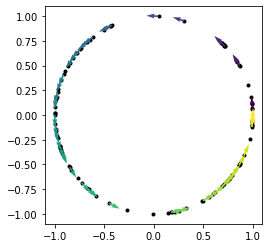

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1)
plot_directed_2d(X, flow, labels)

Now, let lift this into 3 dimensions

In [ ]:
# export
def plot_origin_3d(ax, lim):
  ax.plot(lim,[0,0],[0,0], color="k", alpha=0.5)
  ax.plot([0,0],lim,[0,0], color="k", alpha=0.5)
  ax.plot([0,0],[0,0],lim, color="k", alpha=0.5)

def plot_directed_3d(X, flow, labels, mask_prob=0.5):
  num_nodes = X.shape[0]
  colors = plt.cm.viridis(labels/(2*np.pi))
  mask = np.random.rand(num_nodes) > mask_prob
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  plot_origin_3d(ax, lim=[-1,1])
  ax.scatter(X[:,0], X[:,1], X[:,2], marker=".", c=labels)
  ax.quiver(X[mask,0], X[mask,1], X[mask,2], flow[mask,0], flow[mask,1], flow[mask,2], alpha=0.1, length=0.5)
  plt.show()

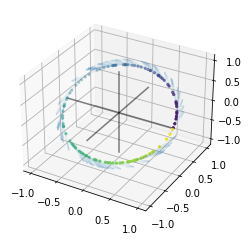

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

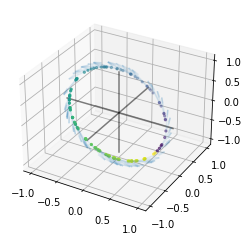

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

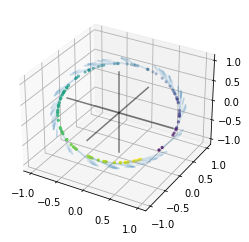

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, xtilt=np.pi/4, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels)

Let extend this further to a 2-manifold cylinder with direction.

In [ ]:
# export
def directed_prism(X, flow, labels, height=10):
  num_nodes = X.shape[0]
  z_noise = np.random.uniform(-height/2, height/2, num_nodes)
  X[:,2] = X[:,2] + z_noise
  return X, flow, labels

In [ ]:
# export
def directed_cylinder(num_nodes=1000, radius=1, height=10, xtilt=0, ytilt=0):
  X, flow, labels = directed_circle(num_nodes, radius, xtilt, ytilt)
  X, flow, labels = directed_prism(X, flow, labels, height)
  return X, flow, labels

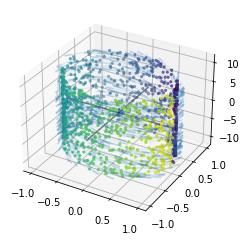

In [ ]:
X, flow, labels = directed_cylinder(num_nodes=1000, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

## Swiss roll

Similarly, we can generate a swiss roll and a 

In [ ]:
# export
def directed_spiral(num_nodes=100, num_spirals=2.5, radius=1, xtilt=0, ytilt=0):
  # sample random angles between 0 and num_spirals * 2pi
  thetas = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
  thetas = np.sort(thetas)
  labels = thetas
  # calculate x and y coordinates
  x = np.cos(thetas) * thetas * radius
  y = np.sin(thetas) * thetas * radius
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  # calculate the angle of the tangent
  alphas = thetas + np.pi/2
  # calculate the coordinates of the tangent
  u = np.cos(alphas) * thetas
  v = np.sin(alphas) * thetas
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # tilt 
  xrotate = np.array([[1,              0,             0],
                      [0,  np.cos(xtilt), np.sin(xtilt)],
                      [0, -np.sin(xtilt), np.cos(xtilt)]])
  X = X @ xrotate
  flow = flow @ xrotate
  yrotate = np.array([[np.cos(ytilt), 0, -np.sin(ytilt)],
                      [            0, 1,              0],
                      [np.sin(ytilt), 0,  np.cos(ytilt)]])
  X = X @ yrotate
  flow = flow @ yrotate
  return X, flow, labels

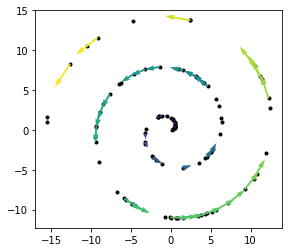

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1)
plot_directed_2d(X, flow, labels)

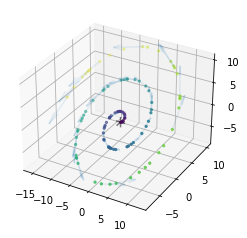

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
# export
def directed_swiss_roll(num_nodes=1000, num_spirals=2.5, radius=1, height=10, xtilt=0, ytilt=0):
  X, flow, labels = directed_spiral(num_nodes, num_spirals, radius, xtilt, ytilt)
  X, flow, labels = directed_prism(X, flow, labels, height)
  return X, flow, labels

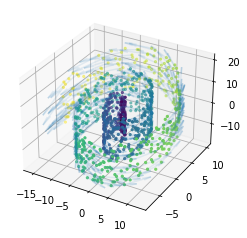

In [ ]:
X, flow, labels = directed_swiss_roll(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)